In [15]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="../data",
    train = True, 
    download=False,
    transform=ToTensor(),
)
test_data = datasets.FashionMNIST(
    root = "../data",
    train = False,
    download=False,
    transform=ToTensor()
)


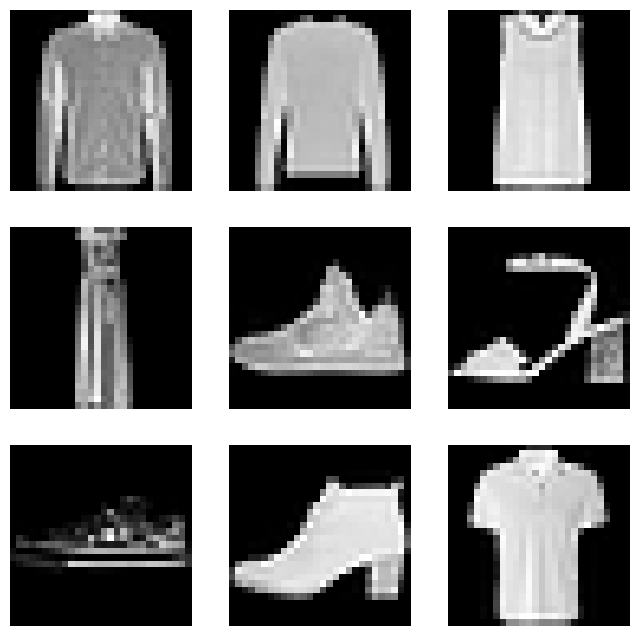

In [14]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# print(f"Initial Shape: {training_data.shape}")
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3 
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(high=len(training_data), size = (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [16]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):

    def __init__(self, annotation_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.image_labels)
    
    def __getitem__(self, idx):
        image_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(image_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
